In [1]:
#! pip install data_describe

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#import data_describe as mw

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [4]:
import matplotlib
matplotlib.style.use('ggplot')
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 100)
pd.set_option('max_columns', None)
warnings.filterwarnings('ignore')

In [5]:
# /home/jupyter/awesome-data-science-models/lending-club/EDA
!gsutil cp gs://amazing-public-data/lending_club/lending_club_data.tsv .

Copying gs://amazing-public-data/lending_club/lending_club_data.tsv...
/ [1 files][  4.2 MiB/  4.2 MiB]                                                
Operation completed over 1 objects/4.2 MiB.                                      


In [6]:
dtypes={
        "Id": "int64",
        "is_bad": "int64",
        "emp_length": "float64",
        "home_ownership": "object",
        "annual_inc": "float64",
        "verification_status": "object",
        "purpose_cat": "object",
        "addr_state": "object",
        "debt_to_income": "float64",
        "delinq_2yrs": "float64",
        "earliest_cr_line": "str",
        "inq_last_6mths": "float64",
        "mths_since_last_delinq": "float64",
        "mths_since_last_record": "float64",
        "open_acc": "float64",
        "pub_rec": "float64",
        "revol_bal": "float64",
        "revol_util": "float64",
        "total_acc": "float64",
        "mths_since_last_major_derog": "int64",
        "policy_code": "object"
    }

df = pd.read_csv("./lending_club_data.tsv",
                 sep="\t",
                 na_values={"emp_length": "na"},
                 keep_default_na=True,
                 usecols=dtypes.keys(),
                 dtype=dtypes)

In [7]:
df.shape

(10000, 21)

In [8]:
df.head()

Id  is_bad  emp_length home_ownership  annual_inc verification_status         purpose_cat  \
0   1       0        10.0       MORTGAGE     50000.0        not verified             medical   
1   2       0         1.0           RENT     39216.0        not verified  debt consolidation   
2   3       0         4.0           RENT     65000.0        not verified         credit card   
3   4       0        10.0       MORTGAGE     57500.0        not verified  debt consolidation   
4   5       0        10.0       MORTGAGE     50004.0   VERIFIED - income  debt consolidation   

  addr_state  debt_to_income  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         TX           10.87          0.0          12/1/92             0.0   
1         KS            9.15          0.0          11/1/05             2.0   
2         CA           11.24          0.0           6/1/70             0.0   
3         NY            6.18          1.0           9/1/82             0.0   
4         OH           19.03          0.0          10/1/99             4.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN                     NaN      15.0      0.0    12087.0        12.1   
1                     NaN                     NaN       4.0      0.0    10114.0        64.0   
2                     NaN                     NaN       4.0      0.0       81.0         0.6   
3                    16.0                     NaN       6.0      0.0    10030.0        37.1   
4                     NaN                     NaN       8.0      0.0    10740.0        40.4   

   total_acc  mths_since_last_major_derog policy_code  
0       44.0                            1         PC4  
1        5.0                            2         PC1  
2        8.0                            3         PC4  
3       23.0                            2         PC2  
4       21.0                            3         PC3

In [9]:
df.drop(['Id'], axis=1, inplace=True)

In [10]:
# By looking at the data in "Notes", "purpose columns" there was some incorrect mapping present. That has been corrected by replacing the category with the correct value 

df['purpose_cat'] = df['purpose_cat'].map(dict({'medical':'medical', 'debt consolidation':'debt consolidation', 'credit card':'credit card', 'other':'other', 'wedding':'wedding',
       'house':'house', 'small business':'small business', 'educational':'educational', 'major purchase':'major purchase', 'car':'car',
       'home improvement':'home improvement', 'vacation':'vacation', 'other small business':'other',
       'debt consolidation small business':'debt consolidation', 'moving':'moving',
       'credit card small business':'credit card', 'wedding small business':'wedding',
       'small business small business':'small business', 'home improvement small business':'home improvement',
       'educational small business':'educational', 'house small business':'house',
       'renewable energy':'renewable energy', 'major purchase small business':'major purchase',
       'moving small business':'moving', 'medical small business':'medical',
       'vacation small business':'vacation', 'car small business':'car'}))
df['purpose_cat'].unique()

array(['medical', 'debt consolidation', 'credit card', 'other', 'car',
       'wedding', 'house', 'small business', 'educational',
       'major purchase', 'home improvement', 'vacation', 'moving',
       'renewable energy'], dtype=object)

In [11]:
df_summary= pd.DataFrame(df.T.apply(lambda x: x.nunique(),axis=1))#.sort_values(ascending=False))
df_summary.columns=['Unique_values']
df_summary['data_type']=df.dtypes
df_summary.reset_index(drop=False,inplace=True)
df_summary.columns=['factors','Unique_values','data_type']
df_loan_null=pd.DataFrame(df.isnull().sum()*100 / len(df),columns=['Missing Value Percentage'])
df_loan_null.reset_index(drop=False,inplace=True)
df_loan_null.columns=['factors','Missing Value Percentage']
df_summary= pd.merge(df_summary,df_loan_null,on='factors')
df_summary = df_summary.sort_values('Missing Value Percentage',ascending=False).reset_index(drop=True)
df_summary

factors  Unique_values data_type  Missing Value Percentage
0        mths_since_last_record             94   float64                     91.60
1        mths_since_last_delinq             91   float64                     63.16
2                    emp_length             13   float64                      2.50
3                    revol_util           1027   float64                      0.26
4                inq_last_6mths             20   float64                      0.05
5                      open_acc             36   float64                      0.05
6                     total_acc             75   float64                      0.05
7                       pub_rec              4   float64                      0.05
8                   delinq_2yrs             10   float64                      0.05
9              earliest_cr_line            463    object                      0.05
10                   annual_inc           1901   float64                      0.01
11  mths_since_last_major_derog              3     int64                      0.00
12                    revol_bal           8130   float64                      0.00
13                       is_bad              2     int64                      0.00
14               debt_to_income           2585   float64                      0.00
15                   addr_state             50    object                      0.00
16                  purpose_cat             14    object                      0.00
17          verification_status              3    object                      0.00
18               home_ownership              5    object                      0.00
19                  policy_code              5    object                      0.00

In [12]:
### remove rows which have null earliest_cr_line as they are very few (5/10,0000)
df=df[df.earliest_cr_line.notna()]
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line,format='%m/%d/%y', yearfirst=True)

In [13]:
df['earliest_cr_line']=[pd.to_datetime(datetime.datetime(d.year-100,d.month,d.day)) if d > pd.to_datetime('2010-01-01') else d for d in df['earliest_cr_line']]
# correct wrongly converted time types 

In [14]:
#earliest_cr = df.earliest_cr_line.dropna()
df['earliest_cr_yr'] = df.earliest_cr_line.dt.year.astype(int)

In [15]:
object_cols=df.columns[df.dtypes=='object'].tolist()
cat_cols = df.columns[df.dtypes=='category'].tolist()
cat_cols= object_cols+ cat_cols

In [16]:
num_cols =  df.columns[df.dtypes=='float'].tolist()
num_cols = num_cols+['is_bad','earliest_cr_yr']


In [17]:
df.describe(include='all').T

count unique                  top  freq      first       last  \
is_bad                       9995.0    NaN                  NaN   NaN        NaT        NaT   
emp_length                   9745.0    NaN                  NaN   NaN        NaT        NaT   
home_ownership                 9995      4                 RENT  4742        NaT        NaT   
annual_inc                   9995.0    NaN                  NaN   NaN        NaT        NaT   
verification_status            9995      3         not verified  4362        NaT        NaT   
purpose_cat                    9995     14   debt consolidation  4556        NaT        NaT   
addr_state                     9995     50                   CA  1748        NaT        NaT   
debt_to_income               9995.0    NaN                  NaN   NaN        NaT        NaT   
delinq_2yrs                  9995.0    NaN                  NaN   NaN        NaT        NaT   
earliest_cr_line               9995    463  2000-11-01 00:00:00    95 1950-12-01 2008-11-01   
inq_last_6mths               9995.0    NaN                  NaN   NaN        NaT        NaT   
mths_since_last_delinq       3684.0    NaN                  NaN   NaN        NaT        NaT   
mths_since_last_record        840.0    NaN                  NaN   NaN        NaT        NaT   
open_acc                     9995.0    NaN                  NaN   NaN        NaT        NaT   
pub_rec                      9995.0    NaN                  NaN   NaN        NaT        NaT   
revol_bal                    9995.0    NaN                  NaN   NaN        NaT        NaT   
revol_util                   9974.0    NaN                  NaN   NaN        NaT        NaT   
total_acc                    9995.0    NaN                  NaN   NaN        NaT        NaT   
mths_since_last_major_derog  9995.0    NaN                  NaN   NaN        NaT        NaT   
policy_code                    9995      5                  PC3  2098        NaT        NaT   
earliest_cr_yr               9995.0    NaN                  NaN   NaN        NaT        NaT   

                                     mean           std     min      25%      50%      75%  \
is_bad                           0.129565      0.335841     0.0      0.0      0.0      0.0   
emp_length                       4.989944      3.447724     1.0      2.0      4.0      9.0   
home_ownership                        NaN           NaN     NaN      NaN      NaN      NaN   
annual_inc                    68206.04426    48578.8612  2000.0  40000.0  58000.0  82000.0   
verification_status                   NaN           NaN     NaN      NaN      NaN      NaN   
purpose_cat                           NaN           NaN     NaN      NaN      NaN      NaN   
addr_state                            NaN           NaN     NaN      NaN      NaN      NaN   
debt_to_income                  13.342519      6.753147     0.0     8.16    13.42     18.7   
delinq_2yrs                      0.148174       0.50627     0.0      0.0      0.0      0.0   
earliest_cr_line                      NaN           NaN     NaN      NaN      NaN      NaN   
inq_last_6mths                   1.066933      1.476052     0.0      0.0      1.0      2.0   
mths_since_last_delinq          35.890337     22.361443     0.0     18.0     34.0     53.0   
mths_since_last_record          61.652381     46.189619     0.0      0.0     86.0    101.0   
open_acc                         9.334567       4.52659     1.0      6.0      9.0     12.0   
pub_rec                           0.06013      0.251245     0.0      0.0      0.0      0.0   
revol_bal                    14278.146473  25442.267364     0.0   3527.5   8652.0  16954.0   
revol_util                      48.450771     28.220557     0.0     25.0     48.7     71.8   
total_acc                       22.011306       11.7094     1.0     13.0     20.0     29.0   
mths_since_last_major_derog      2.002201      0.811042     1.0      1.0      2.0      3.0   
policy_code                           NaN           NaN    

In [18]:
df.describe(include=['float64','int64']).T

count          mean           std     min       25%       50%  \
is_bad                       9995.0      0.129565      0.335841     0.0      0.00      0.00   
emp_length                   9745.0      4.989944      3.447724     1.0      2.00      4.00   
annual_inc                   9995.0  68206.044260  48578.861200  2000.0  40000.00  58000.00   
debt_to_income               9995.0     13.342519      6.753147     0.0      8.16     13.42   
delinq_2yrs                  9995.0      0.148174      0.506270     0.0      0.00      0.00   
inq_last_6mths               9995.0      1.066933      1.476052     0.0      0.00      1.00   
mths_since_last_delinq       3684.0     35.890337     22.361443     0.0     18.00     34.00   
mths_since_last_record        840.0     61.652381     46.189619     0.0      0.00     86.00   
open_acc                     9995.0      9.334567      4.526590     1.0      6.00      9.00   
pub_rec                      9995.0      0.060130      0.251245     0.0      0.00      0.00   
revol_bal                    9995.0  14278.146473  25442.267364     0.0   3527.50   8652.00   
revol_util                   9974.0     48.450771     28.220557     0.0     25.00     48.70   
total_acc                    9995.0     22.011306     11.709400     1.0     13.00     20.00   
mths_since_last_major_derog  9995.0      2.002201      0.811042     1.0      1.00      2.00   
earliest_cr_yr               9995.0   1996.664632      6.828101  1950.0   1994.00   1998.00   

                                 75%         max  
is_bad                           0.0        1.00  
emp_length                       9.0       33.00  
annual_inc                   82000.0   900000.00  
debt_to_income                  18.7       29.99  
delinq_2yrs                      0.0       11.00  
inq_last_6mths                   2.0       25.00  
mths_since_last_delinq          53.0      120.00  
mths_since_last_record         101.0      119.00  
open_acc                        12.0       39.00  
pub_rec                          0.0        3.00  
revol_bal                    16954.0  1207359.00  
revol_util                      71.8      100.60  
total_acc                       29.0       90.00  
mths_since_last_major_derog      3.0        3.00  
earliest_cr_yr                2001.0     2008.00

In [19]:
bad_map = pd.DataFrame({'is_bad':[0,1], 'Bad Loan':['No', 'Yes']})

<AxesSubplot:xlabel='is_bad', ylabel='count'>

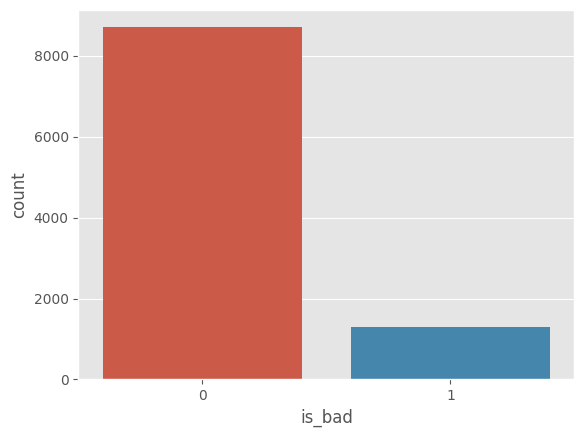

In [20]:
sns.countplot(x='is_bad', data=df.merge(bad_map))

In [21]:
df[['open_acc', 'annual_inc']].describe()

open_acc    annual_inc
count  9995.000000    9995.00000
mean      9.334567   68206.04426
std       4.526590   48578.86120
min       1.000000    2000.00000
25%       6.000000   40000.00000
50%       9.000000   58000.00000
75%      12.000000   82000.00000
max      39.000000  900000.00000

# Inspection of high income applicants

In [22]:
df_high_income = df.loc[df.annual_inc > 600000]
df_high_income.head()

is_bad  emp_length home_ownership  annual_inc       verification_status         purpose_cat  \
240        0        10.0           RENT    900000.0  VERIFIED - income source             wedding   
1296       0        10.0       MORTGAGE    744000.0  VERIFIED - income source  debt consolidation   
4577       1         4.0       MORTGAGE    700000.0              not verified    home improvement   
6816       0        10.0       MORTGAGE    725000.0         VERIFIED - income  debt consolidation   
7425       0        10.0           RENT    780000.0              not verified               house   

     addr_state  debt_to_income  delinq_2yrs earliest_cr_line  inq_last_6mths  \
240          NY            1.04          3.0       1999-11-01             0.0   
1296         MI            1.44          0.0       1995-01-01             5.0   
4577         FL            3.09          0.0       1999-02-01             0.0   
6816         TX            5.40          0.0       1994-02-01             2.0   
7425         MO            0.52          0.0       1987-02-01             3.0   

      mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
240                      5.0                     NaN       6.0      0.0      301.0        13.1   
1296                     NaN                     NaN      14.0      0.0    17166.0        63.6   
4577                    33.0                     NaN       8.0      0.0     6960.0        44.6   
6816                    55.0                     NaN      18.0      0.0    62892.0        70.3   
7425                     NaN                   113.0       8.0      1.0     1608.0        11.1   

      total_acc  mths_since_last_major_derog policy_code  earliest_cr_yr  
240        22.0                            3         PC3            1999  
1296       52.0                            2         PC4            1995  
4577       14.0                            2         PC4            1999  
6816       53.0                            3         PC2            1994  
7425       11.0                            2         PC2            1987

# Univariate Analysis

## Numerical features Univariate Analysis 

emp_length
count    9745.000000
mean        4.989944
std         3.447724
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        33.000000
Name: emp_length, dtype: float64


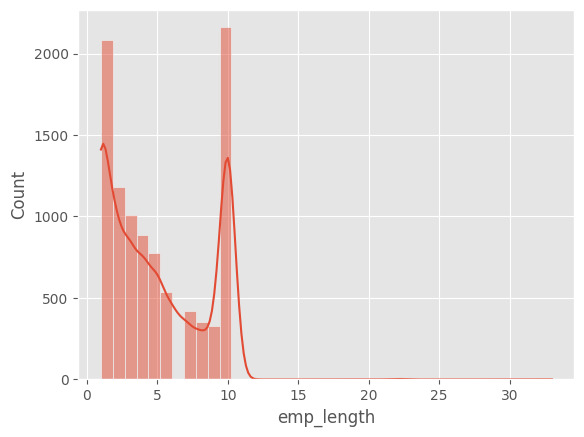


annual_inc
count      9995.00000
mean      68206.04426
std       48578.86120
min        2000.00000
25%       40000.00000
50%       58000.00000
75%       82000.00000
max      900000.00000
Name: annual_inc, dtype: float64


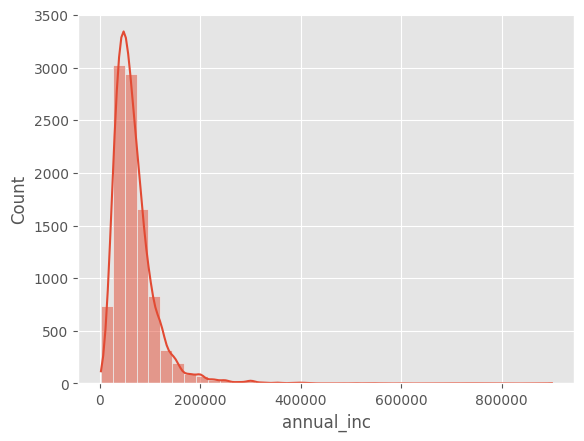


debt_to_income
count    9995.000000
mean       13.342519
std         6.753147
min         0.000000
25%         8.160000
50%        13.420000
75%        18.700000
max        29.990000
Name: debt_to_income, dtype: float64


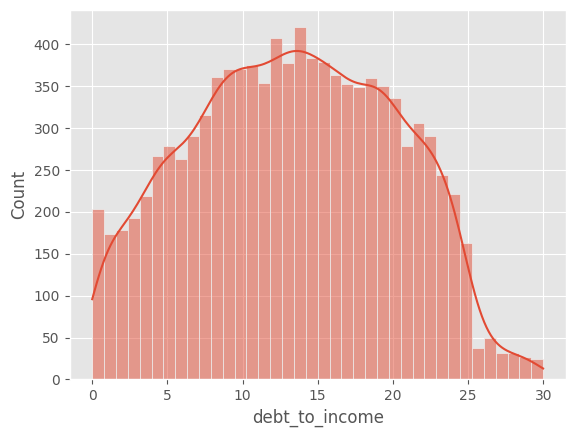


delinq_2yrs
count    9995.000000
mean        0.148174
std         0.506270
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: delinq_2yrs, dtype: float64


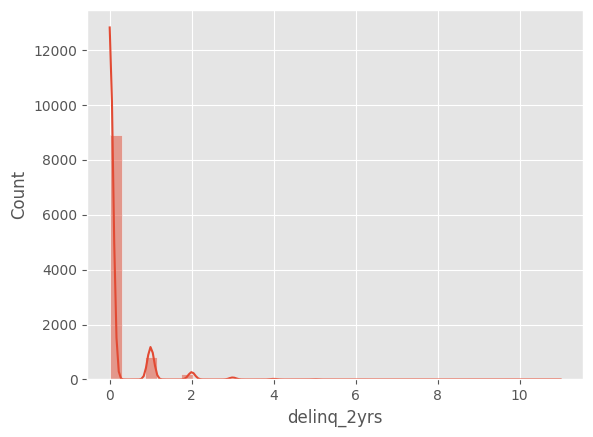


inq_last_6mths
count    9995.000000
mean        1.066933
std         1.476052
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        25.000000
Name: inq_last_6mths, dtype: float64


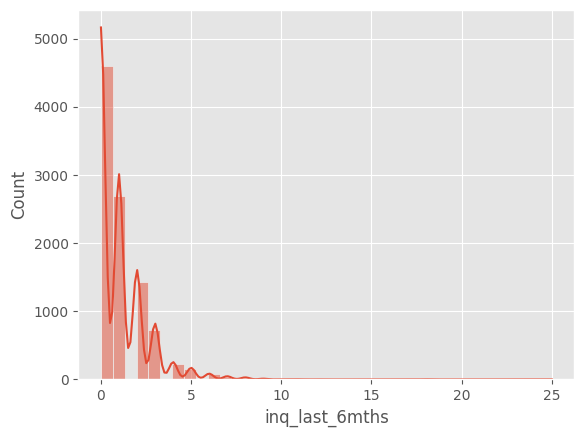


mths_since_last_delinq
count    3684.000000
mean       35.890337
std        22.361443
min         0.000000
25%        18.000000
50%        34.000000
75%        53.000000
max       120.000000
Name: mths_since_last_delinq, dtype: float64


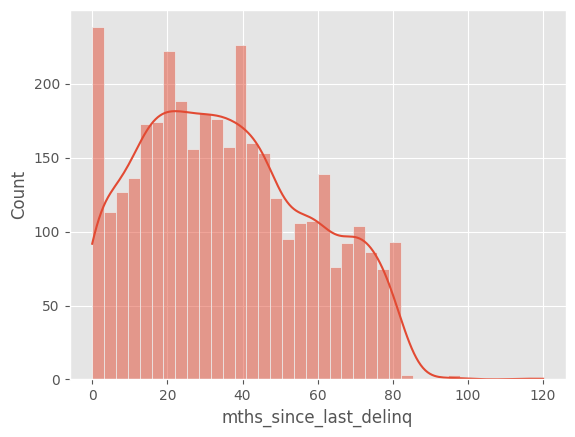


mths_since_last_record
count    840.000000
mean      61.652381
std       46.189619
min        0.000000
25%        0.000000
50%       86.000000
75%      101.000000
max      119.000000
Name: mths_since_last_record, dtype: float64


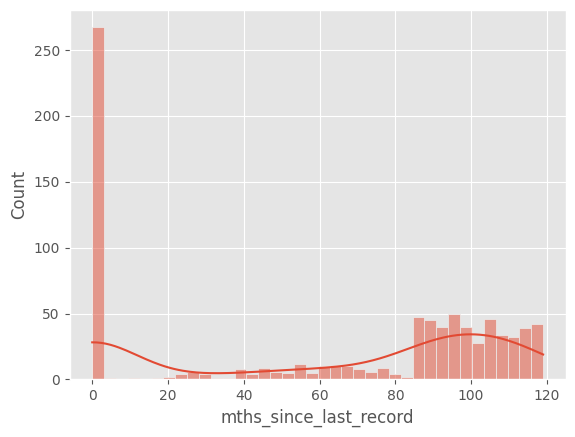


open_acc
count    9995.000000
mean        9.334567
std         4.526590
min         1.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        39.000000
Name: open_acc, dtype: float64


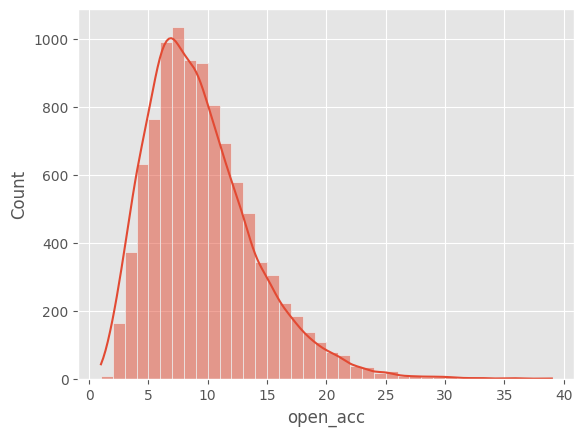


pub_rec
count    9995.000000
mean        0.060130
std         0.251245
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: pub_rec, dtype: float64


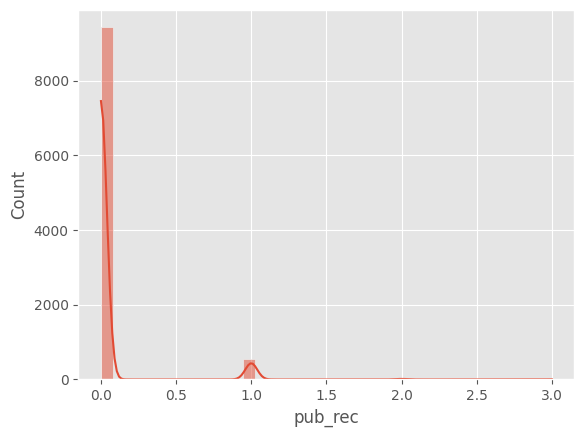


revol_bal
count    9.995000e+03
mean     1.427815e+04
std      2.544227e+04
min      0.000000e+00
25%      3.527500e+03
50%      8.652000e+03
75%      1.695400e+04
max      1.207359e+06
Name: revol_bal, dtype: float64


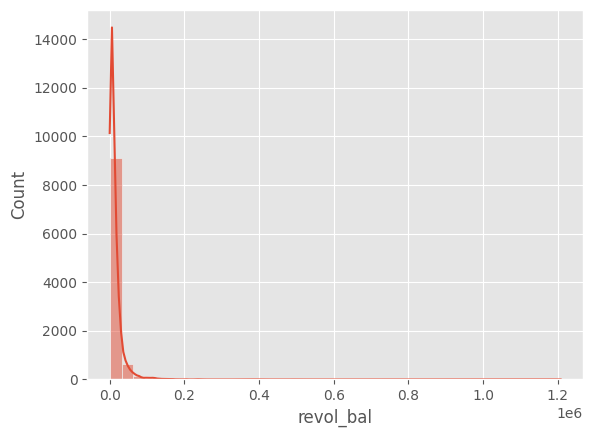


revol_util
count    9974.000000
mean       48.450771
std        28.220557
min         0.000000
25%        25.000000
50%        48.700000
75%        71.800000
max       100.600000
Name: revol_util, dtype: float64


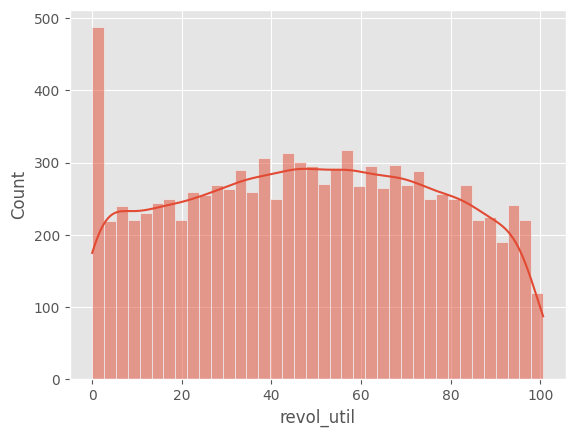


total_acc
count    9995.000000
mean       22.011306
std        11.709400
min         1.000000
25%        13.000000
50%        20.000000
75%        29.000000
max        90.000000
Name: total_acc, dtype: float64


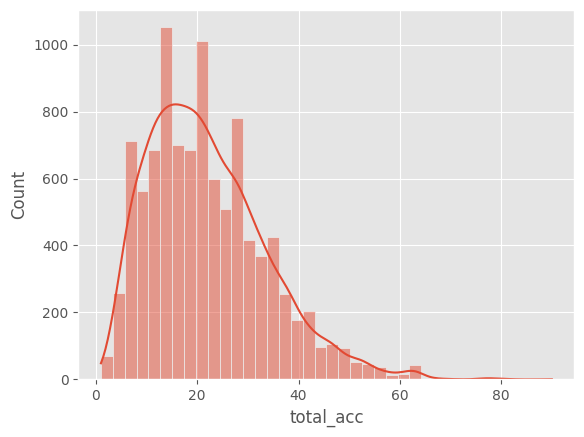


is_bad
count    9995.000000
mean        0.129565
std         0.335841
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: is_bad, dtype: float64


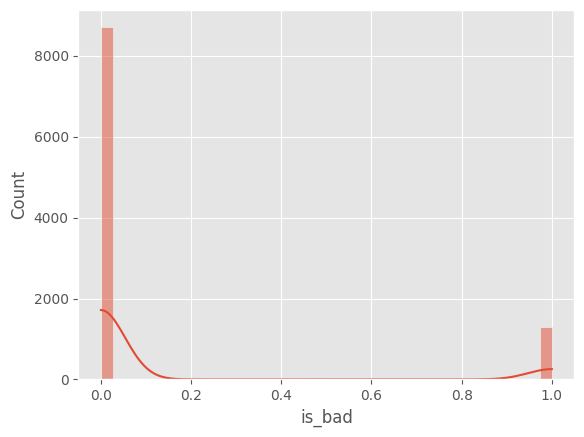


earliest_cr_yr
count    9995.000000
mean     1996.664632
std         6.828101
min      1950.000000
25%      1994.000000
50%      1998.000000
75%      2001.000000
max      2008.000000
Name: earliest_cr_yr, dtype: float64


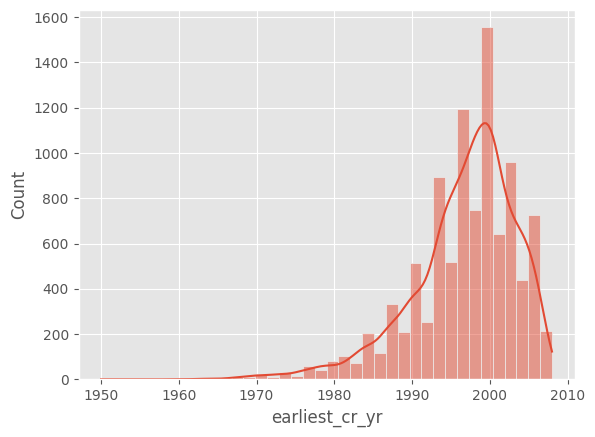

In [23]:
for col in num_cols:
    print(col)
    print(df[col].describe())
    sns.histplot(data=df,x=col,kde=True,bins=38)
    plt.show()
    print()


## Categorical features Univariate Analysis 

RENT        4742
MORTGAGE    4444
OWN          775
OTHER         34
Name: home_ownership, dtype: int64


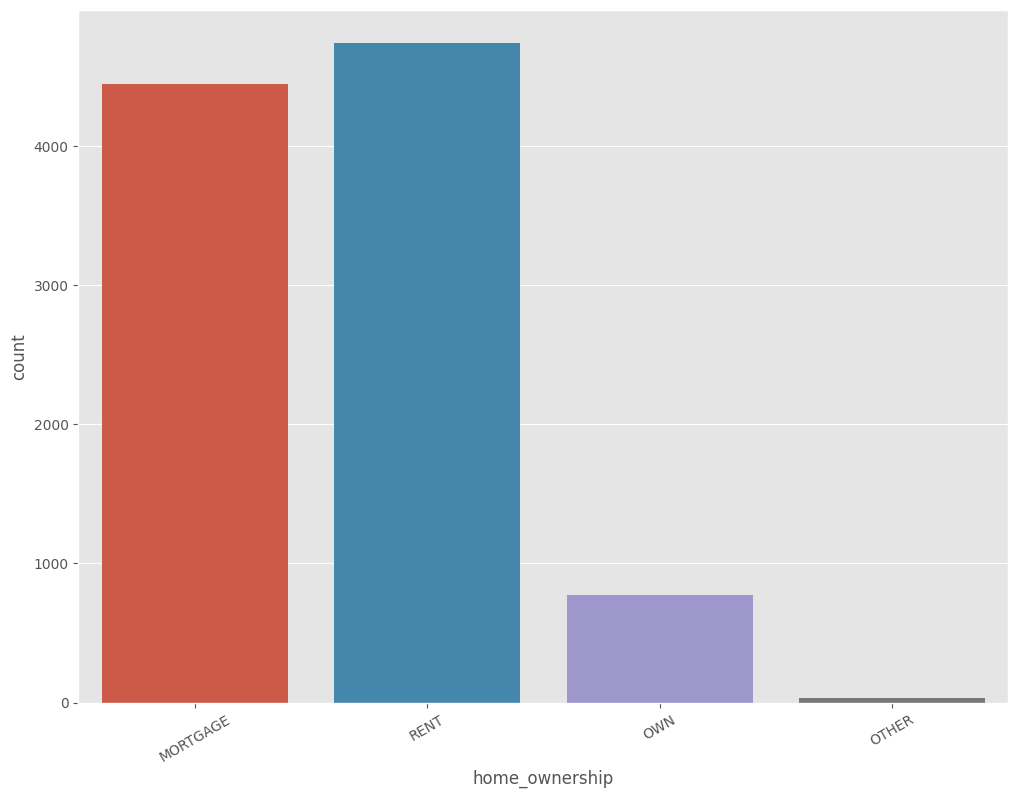


not verified                4362
VERIFIED - income           3214
VERIFIED - income source    2419
Name: verification_status, dtype: int64


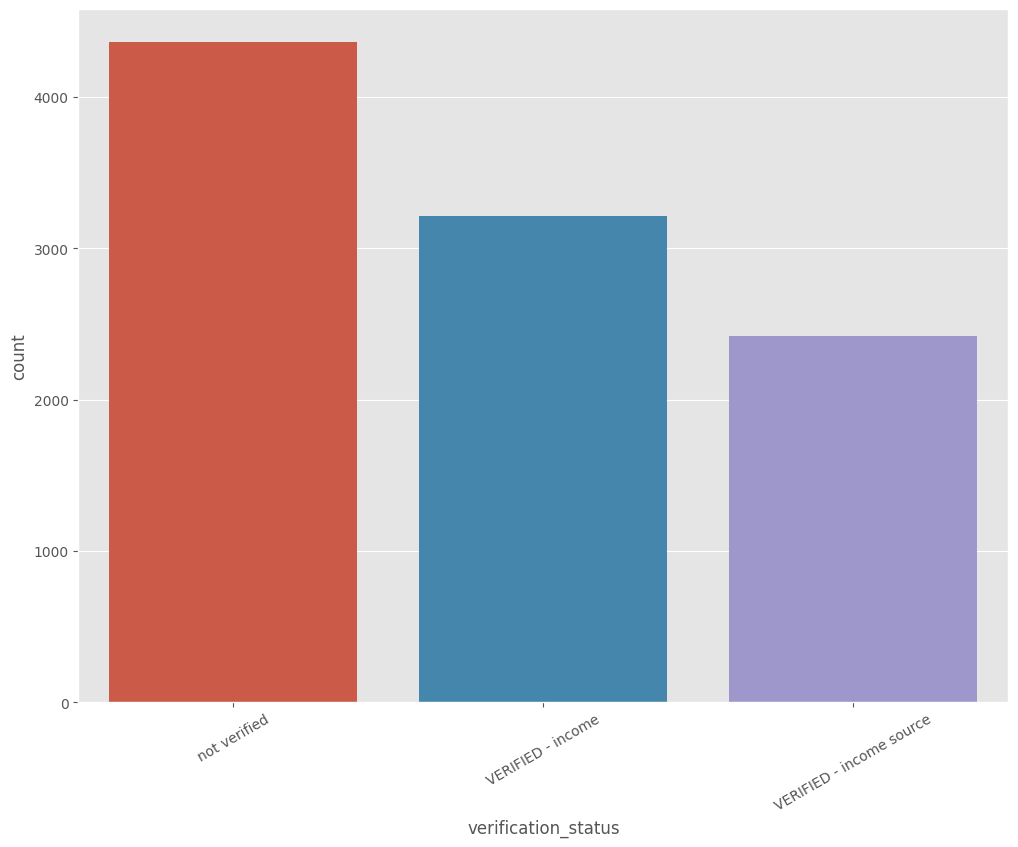


debt consolidation    4556
credit card           1290
other                 1039
home improvement       811
major purchase         551
small business         473
car                    352
wedding                252
medical                185
moving                 162
educational            112
house                   97
vacation                96
renewable energy        19
Name: purpose_cat, dtype: int64


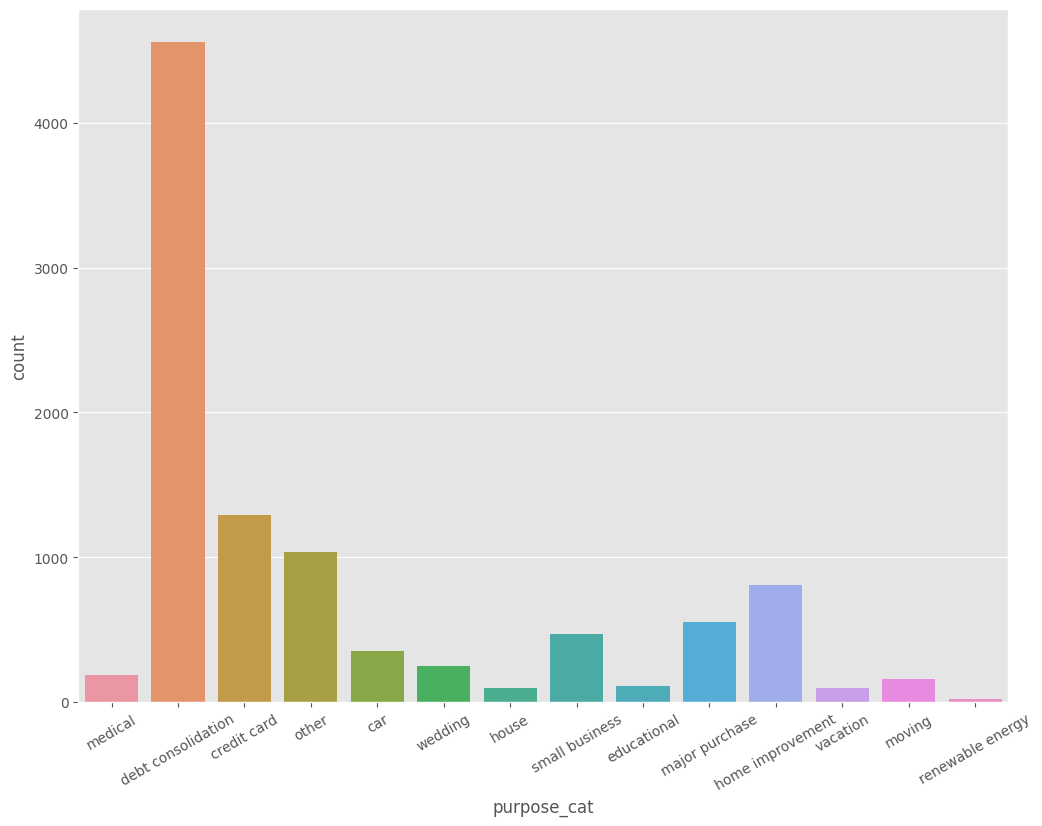


all_others    2357
CA            1748
NY             955
FL             713
TX             700
NJ             482
VA             392
IL             386
PA             378
GA             357
MA             331
OH             292
MD             282
WA             217
AZ             210
CT             195
Name: addr_state, dtype: int64


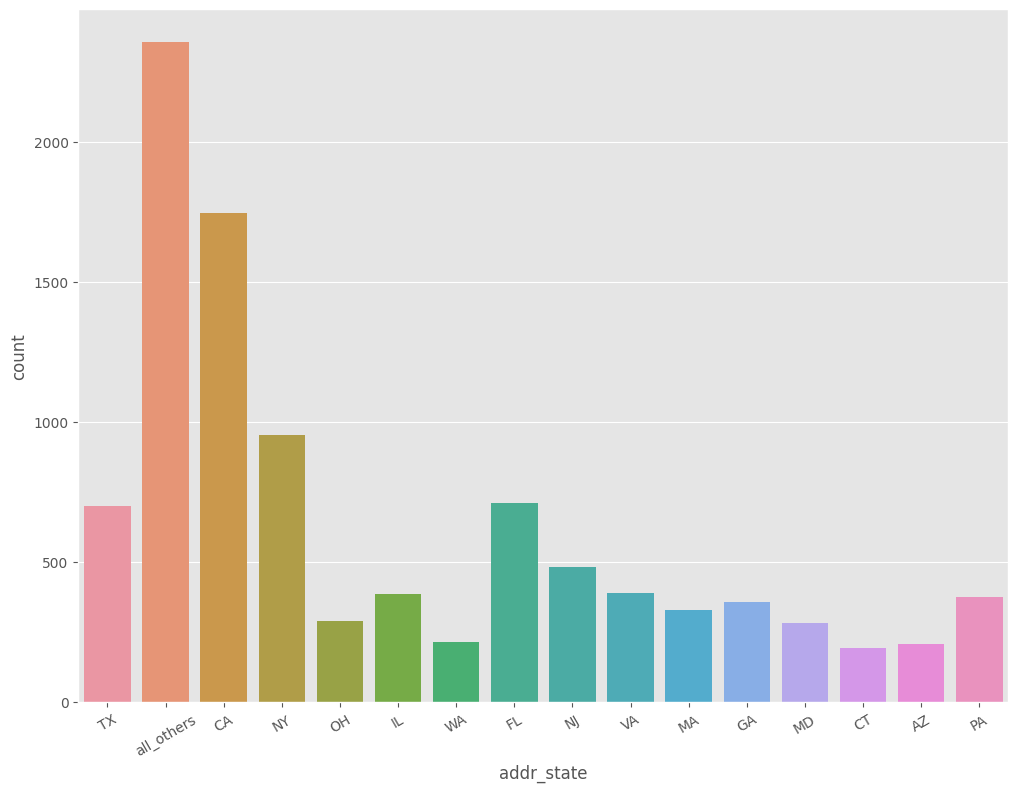


PC3    2098
PC5    2024
PC1    1974
PC2    1962
PC4    1937
Name: policy_code, dtype: int64


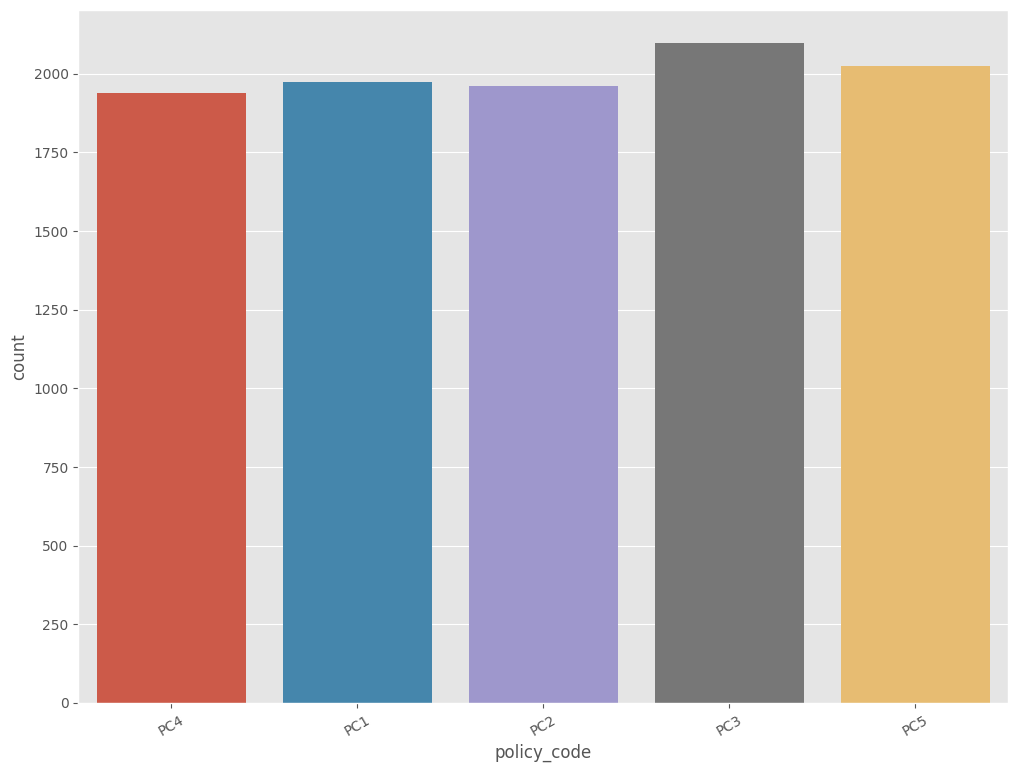

In [24]:
for col in cat_cols:
    df_temp=df.copy()
    select=df[col].value_counts().index.tolist()[:15]
    f,ax=plt.subplots(figsize=(12,9))
    df_temp.loc[~df_temp[col].isin(select),col] = 'all_others'
    print(df_temp[col].value_counts())
    plot=sns.countplot(x=col,data=df_temp)
    plt.setp(plot.get_xticklabels(), rotation=30)
    plt.show()
    print()

# Multivariate Analysis

is_bad home_ownership     0     1   All  Percent Is_bad
0            MORTGAGE  3921   523  4444            11.8
1               OTHER    30     4    34            11.8
2                 OWN   664   111   775            14.3
3                RENT  4085   657  4742            13.9
4                 All  8700  1295  9995            13.0
 Bar plot of  home_ownership  by is_bad


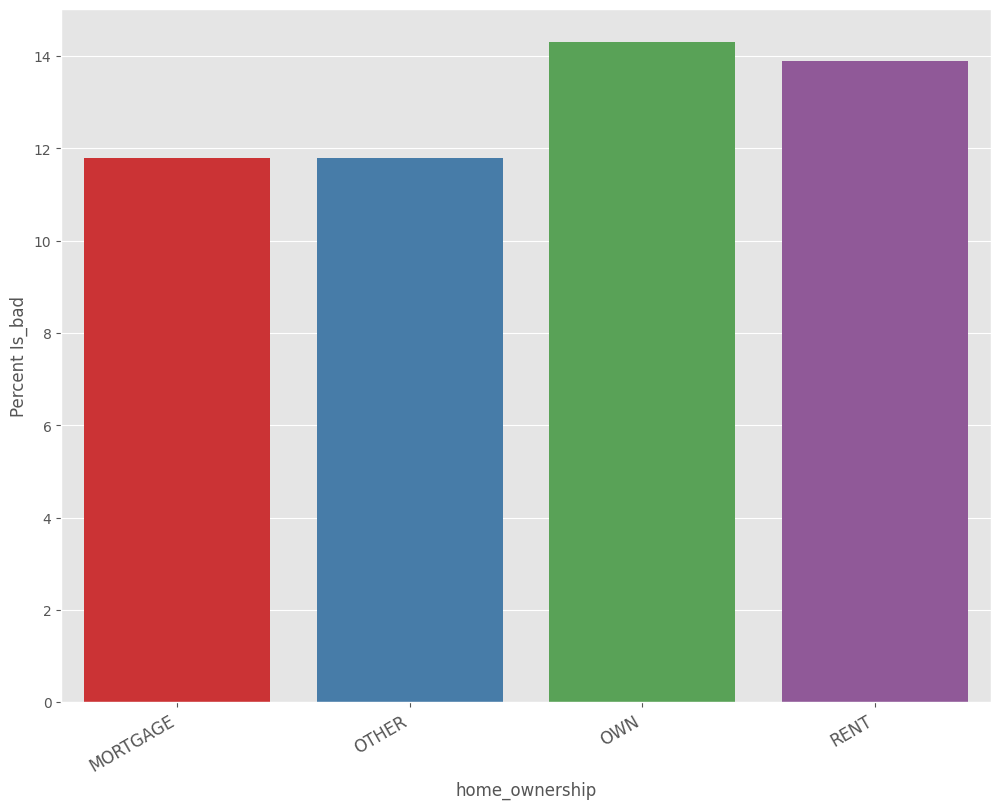


is_bad       verification_status     0     1   All  Percent Is_bad
0              VERIFIED - income  2730   484  3214            15.1
1       VERIFIED - income source  2090   329  2419            13.6
2                   not verified  3880   482  4362            11.0
3                            All  8700  1295  9995            13.0
 Bar plot of  verification_status  by is_bad


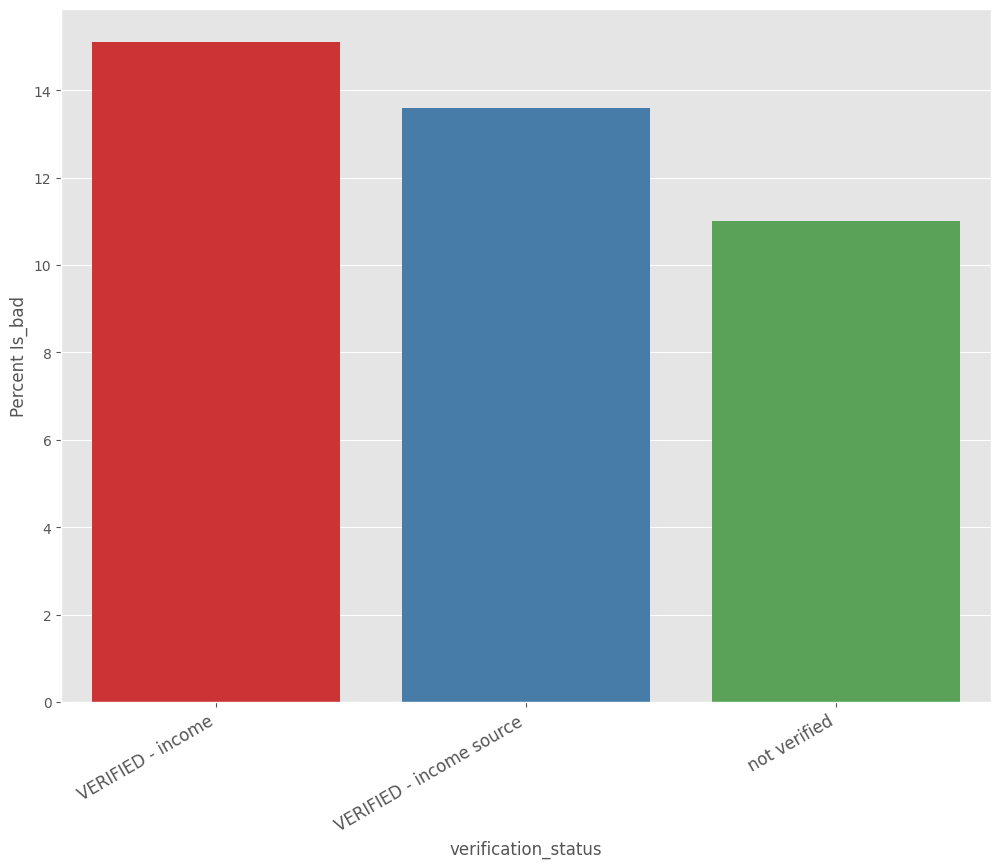


is_bad         purpose_cat     0     1   All  Percent Is_bad
0                      car   320    32   352             9.1
1              credit card  1170   120  1290             9.3
2       debt consolidation  3932   624  4556            13.7
3              educational   101    11   112             9.8
4         home improvement   714    97   811            12.0
5                    house    88     9    97             9.3
6           major purchase   495    56   551            10.2
7                  medical   158    27   185            14.6
8                   moving   144    18   162            11.1
9                    other   896   143  1039            13.8
10        renewable energy    17     2    19            10.5
11          small business   345   128   473            27.1
12                vacation    84    12    96            12.5
13                 wedding   236    16   252             6.3
14                     All  8700  1295  9995            13.0
 Bar plot of  purpose_c

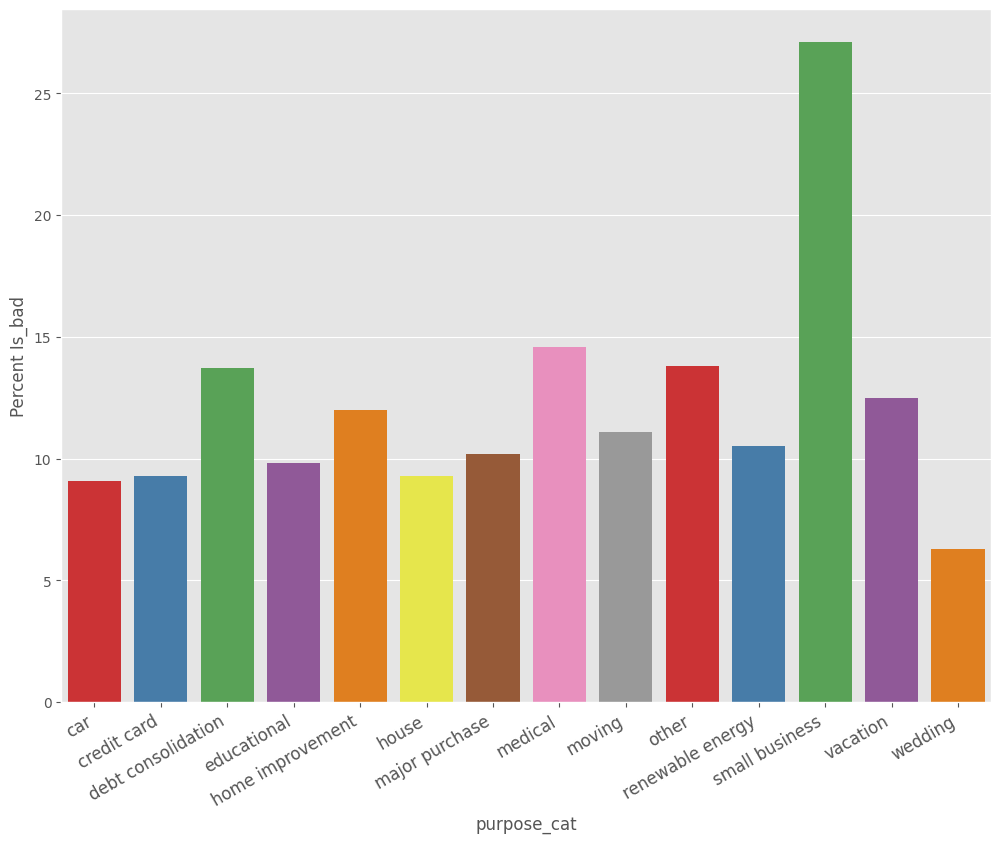


is_bad  addr_state     0     1   All  Percent Is_bad
0               AZ   182    28   210            13.3
1               CA  1487   261  1748            14.9
2               CT   168    27   195            13.8
3               FL   601   112   713            15.7
4               GA   304    53   357            14.8
5               IL   345    41   386            10.6
6               MA   285    46   331            13.9
7               MD   249    33   282            11.7
8               NJ   415    67   482            13.9
9               NY   847   108   955            11.3
10              OH   262    30   292            10.3
11              PA   343    35   378             9.3
12              TX   626    74   700            10.6
13              VA   343    49   392            12.5
14              WA   189    28   217            12.9
15      all_others  2054   303  2357            12.9
16             All  8700  1295  9995            13.0
 Bar plot of  addr_state  by is_bad


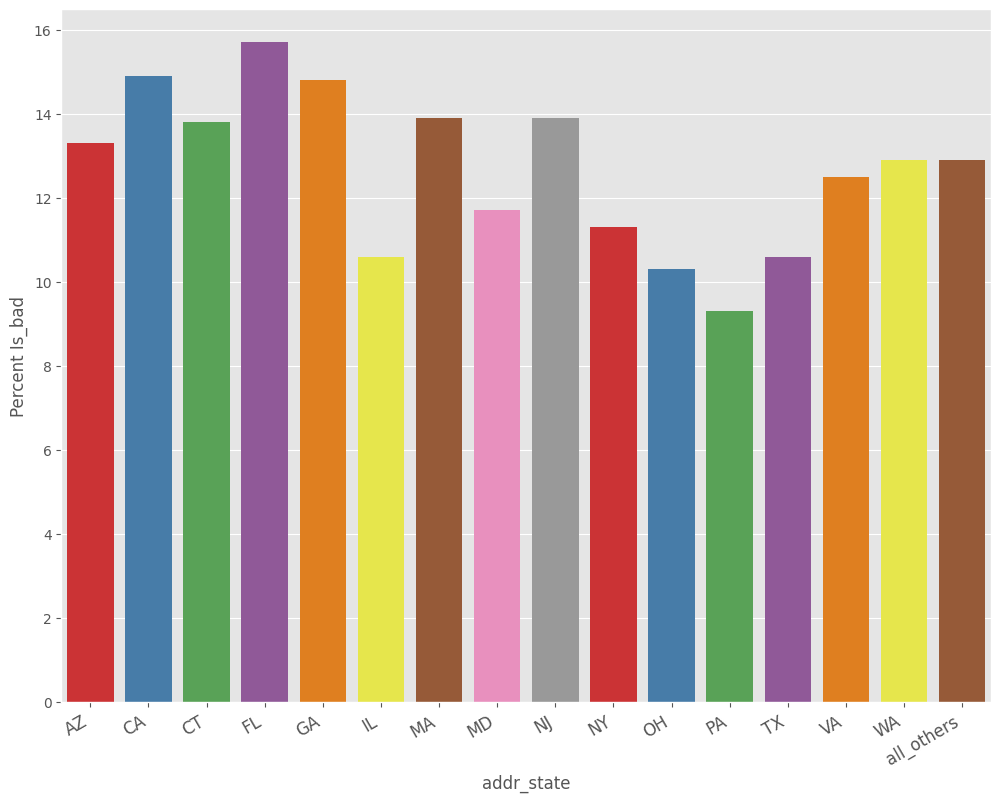


is_bad policy_code     0     1   All  Percent Is_bad
0              PC1  1721   253  1974            12.8
1              PC2  1677   285  1962            14.5
2              PC3  1859   239  2098            11.4
3              PC4  1683   254  1937            13.1
4              PC5  1760   264  2024            13.0
5              All  8700  1295  9995            13.0
 Bar plot of  policy_code  by is_bad


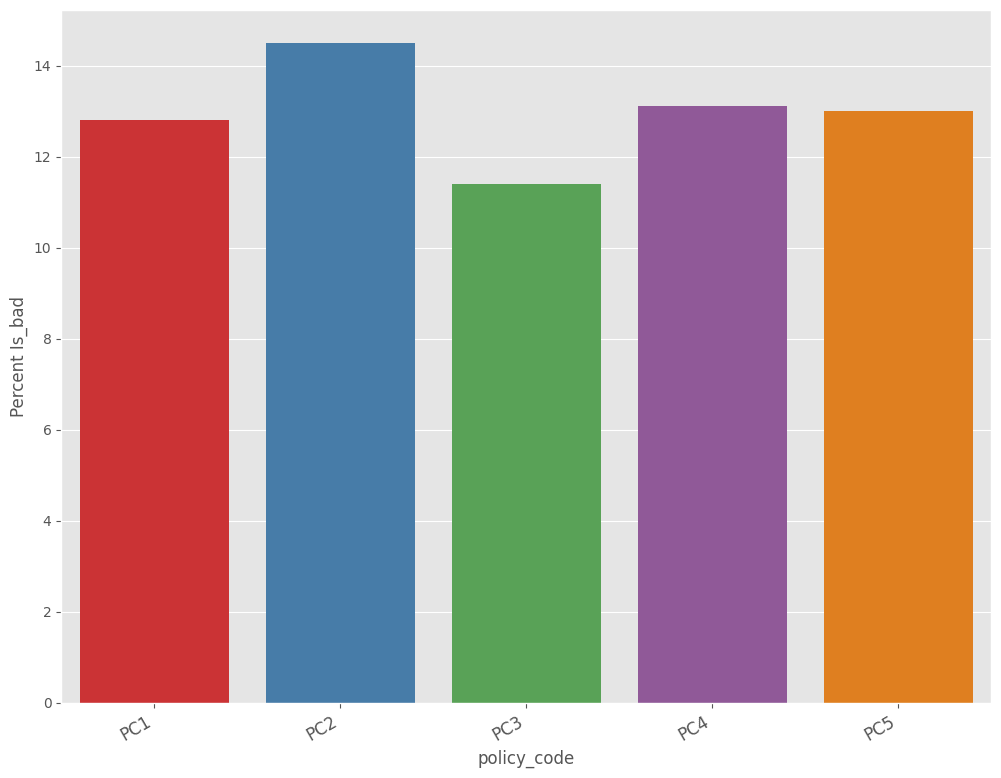

In [25]:
for col in cat_cols:
    df_temp=df.copy()
    select=df[col].value_counts().index.tolist()[:15]
    f,ax=plt.subplots(figsize=(12,9))
    df_temp.loc[~df_temp[col].isin(select),col] = 'all_others'
    
    cross_tb = pd.crosstab(df_temp[col],df_temp['is_bad'],margins=True) # Name the count column
    cross_tb['Percent Is_bad']= round(100*(cross_tb[1]/cross_tb['All']),1)
    cross_tb.reset_index(inplace=True)
    print(cross_tb)
    cross_tb=cross_tb.loc[cross_tb[col]!='All',]
    order_list=cross_tb[col].to_list()
    print( " Bar plot of ", col," by is_bad")
    sns.barplot(x=col, y='Percent Is_bad',order=order_list,data=cross_tb, palette="Set1")
    plt.xticks(
    rotation=30,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large' )
   
    plt.show()
   
    print()

stacked Histogram and density plot for  emp_length


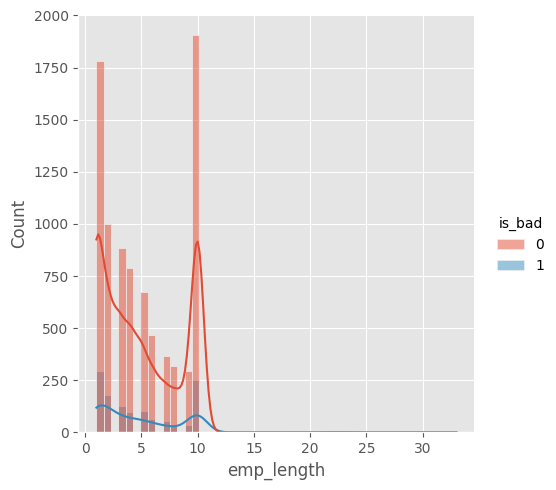

stacked Histogram and density plot for  annual_inc


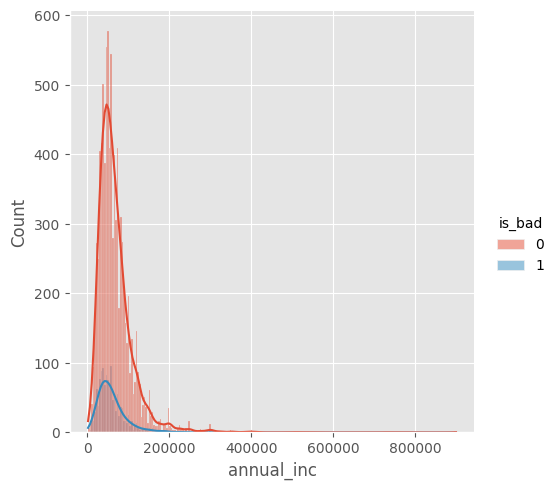

stacked Histogram and density plot for  debt_to_income


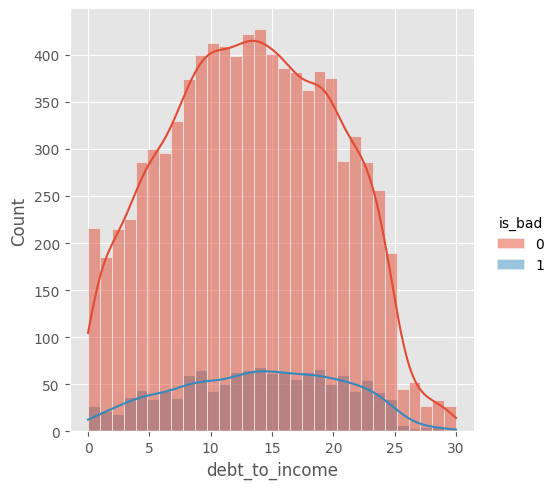

stacked Histogram and density plot for  delinq_2yrs


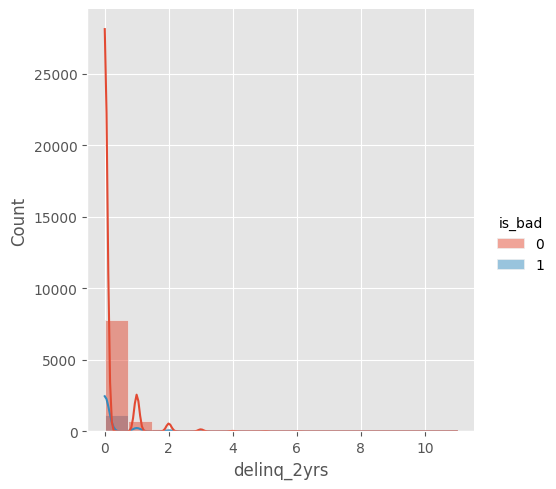

stacked Histogram and density plot for  inq_last_6mths


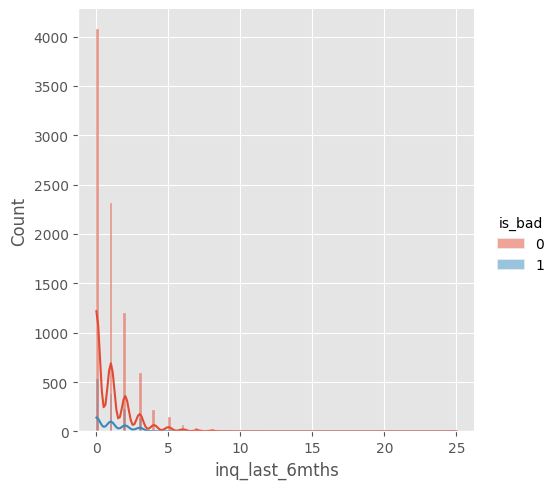

stacked Histogram and density plot for  mths_since_last_delinq


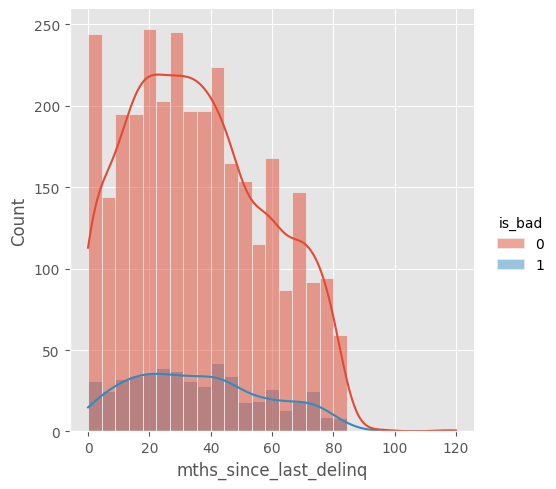

stacked Histogram and density plot for  mths_since_last_record


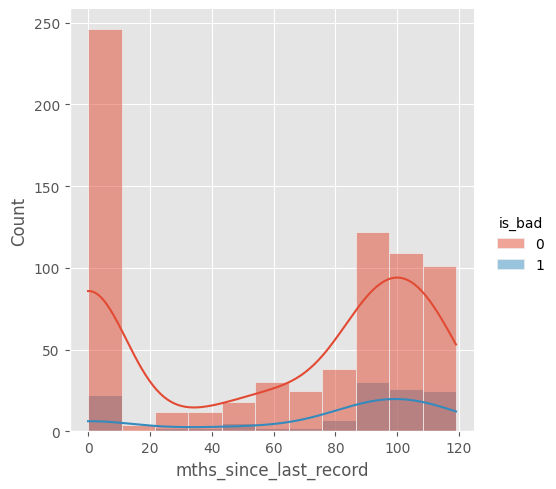

stacked Histogram and density plot for  open_acc


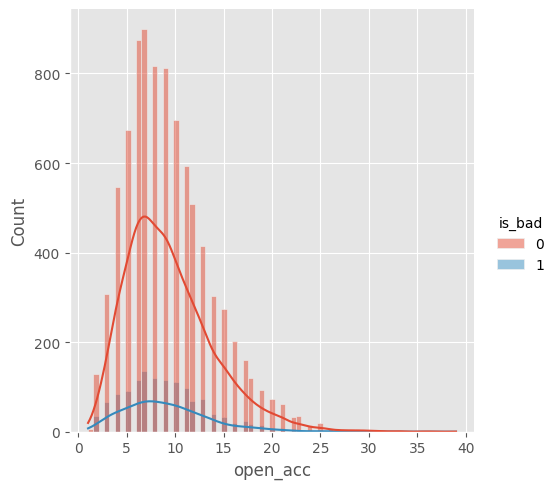

stacked Histogram and density plot for  pub_rec


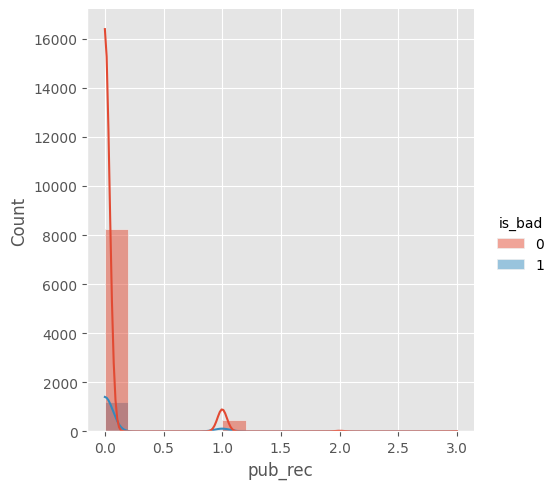

stacked Histogram and density plot for  revol_bal


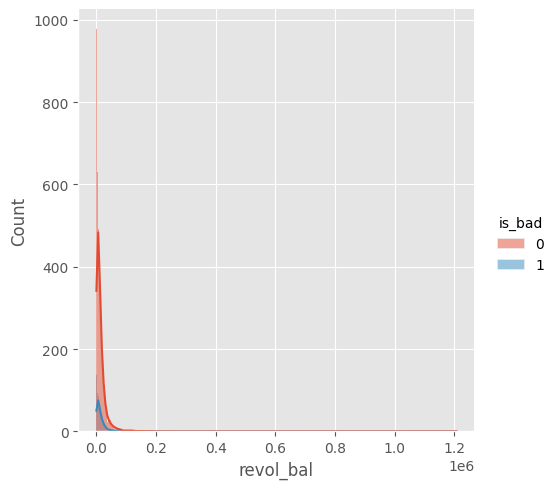

stacked Histogram and density plot for  revol_util


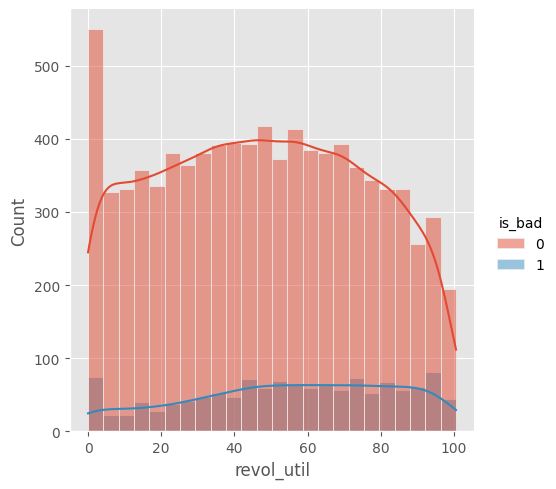

stacked Histogram and density plot for  total_acc


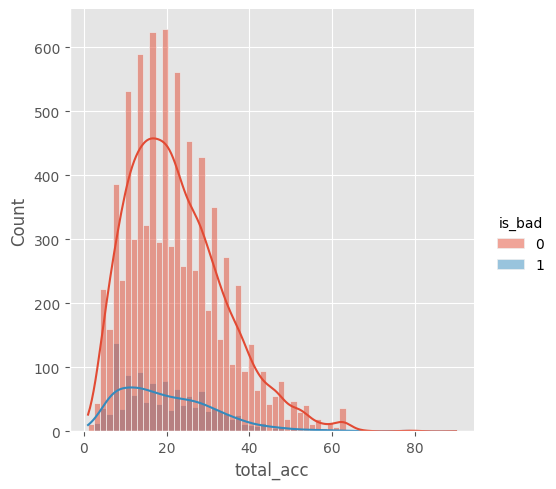

stacked Histogram and density plot for  is_bad


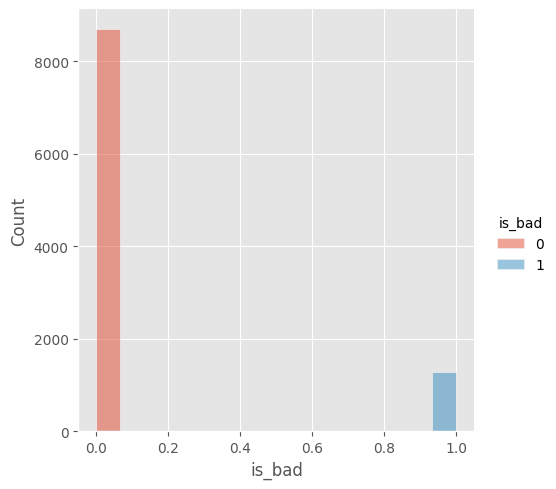

stacked Histogram and density plot for  earliest_cr_yr


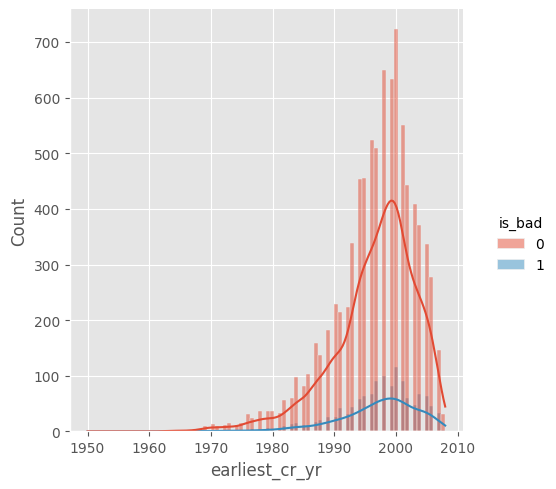

In [26]:
for col in num_cols:
    try:    
        #ax = fig.add_subplot(6,3,num)
        print("stacked Histogram and density plot for ", col)
        sns.displot(data=df,x=col,hue='is_bad',kde=True)
        plt.show()
        
    except:
        print(col,'not supported')
plt.show()

## Correlation

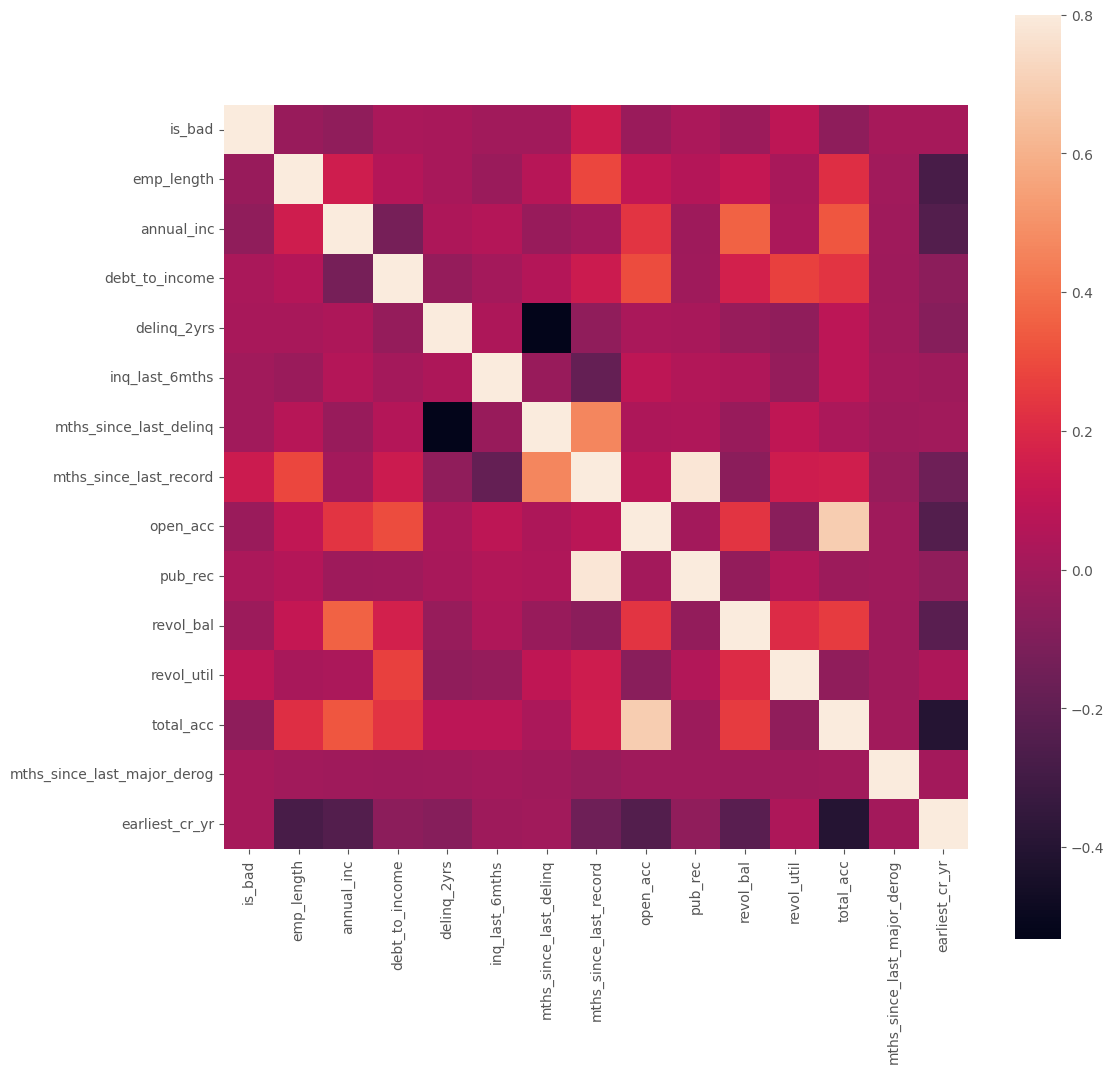

In [27]:
#mw.correlation_matrix(df, cluster=False)
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = df.corr()
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,vmax=0.8,square=True)
plt.show()

## Scatter plots

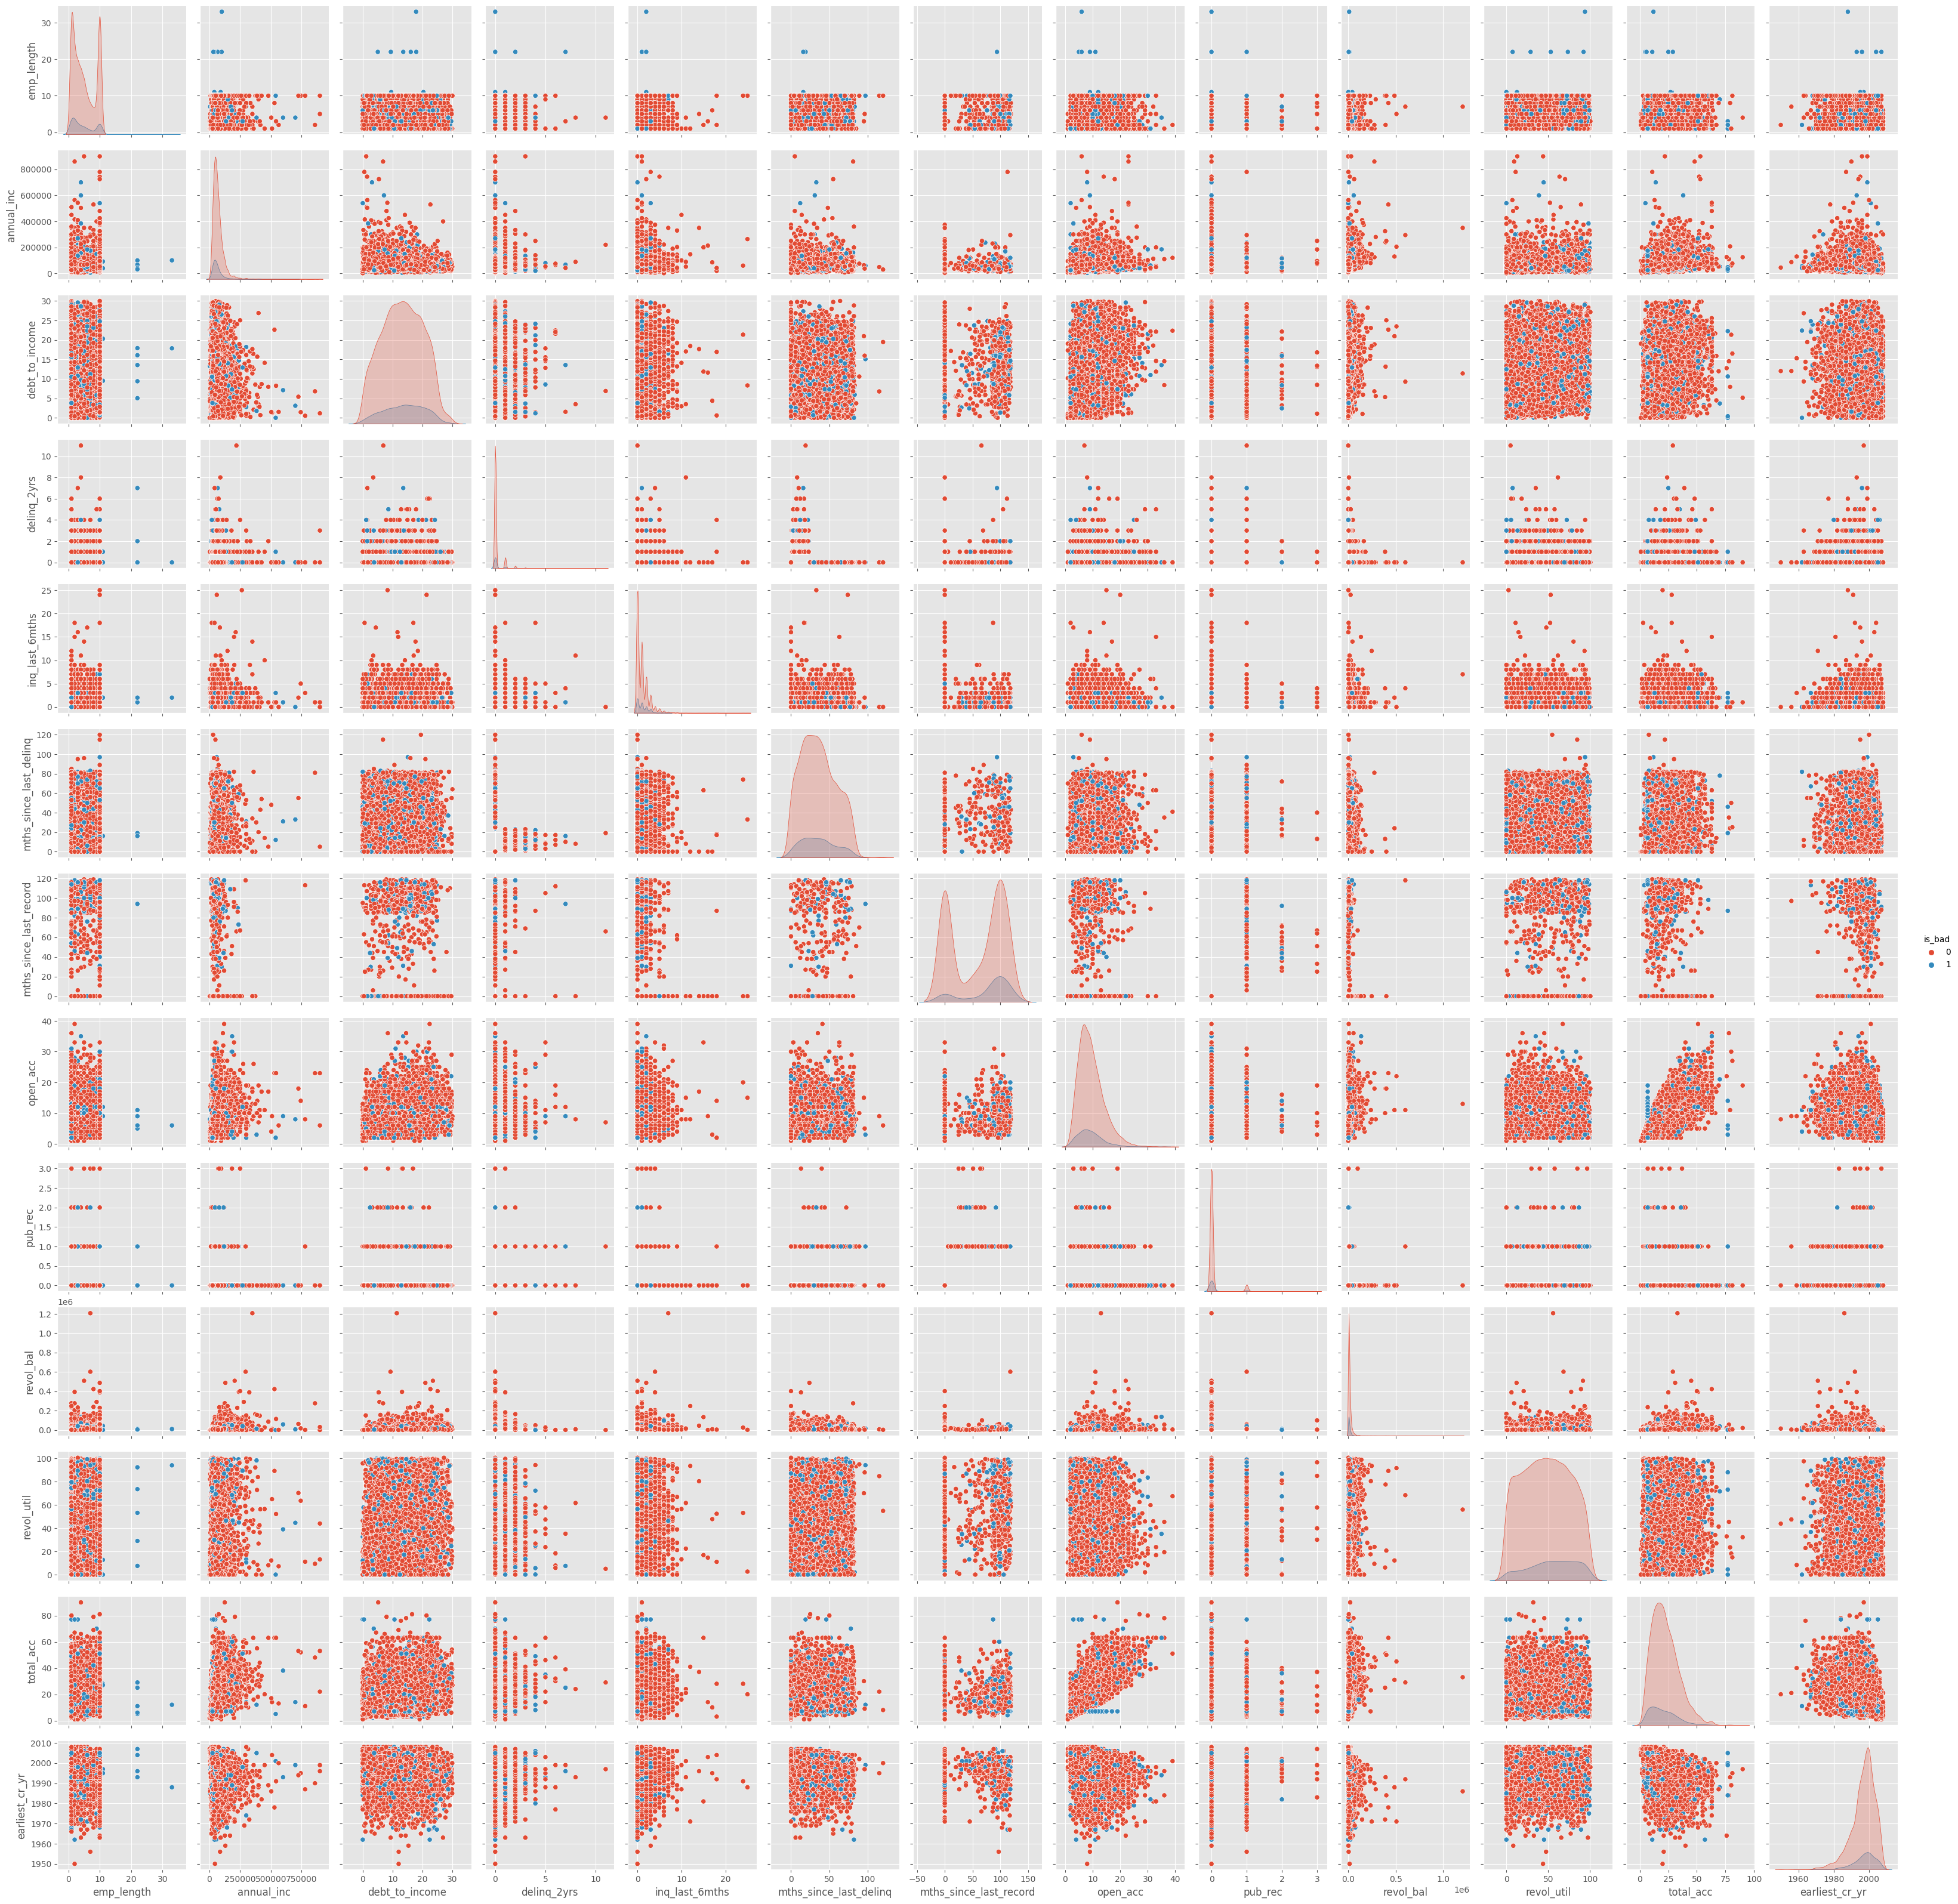

In [28]:
sns.pairplot(df[num_cols],hue='is_bad')